In [1]:
import pandas as pd
import numpy as np
# data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# libraries
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

#Increasing the columns views limit
pd.options.display.max_columns = None
pd.options.display.max_rows = 150
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df = pd.read_csv('Leads.csv')

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [3]:
df.shape

(9240, 37)

In [4]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  15.56
How did you hear about X Education              23.89
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

In [7]:
#dropping Lead Number and Prospect ID since they have all unique values

df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [8]:
# Dropping columns with high null values

In [9]:
columns=df.columns

for i in columns:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 20):
        df.drop(i, 1, inplace = True)

In [10]:
def do_count_plot(field, hue):
    plt.figure(figsize=(15,5))
    s1=sns.countplot(field, hue=hue)
    s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    plt.show()

In [11]:
df['City'].value_counts(dropna=False)


Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [12]:
df['City'] = df['City'].replace(np.nan,'Mumbai')

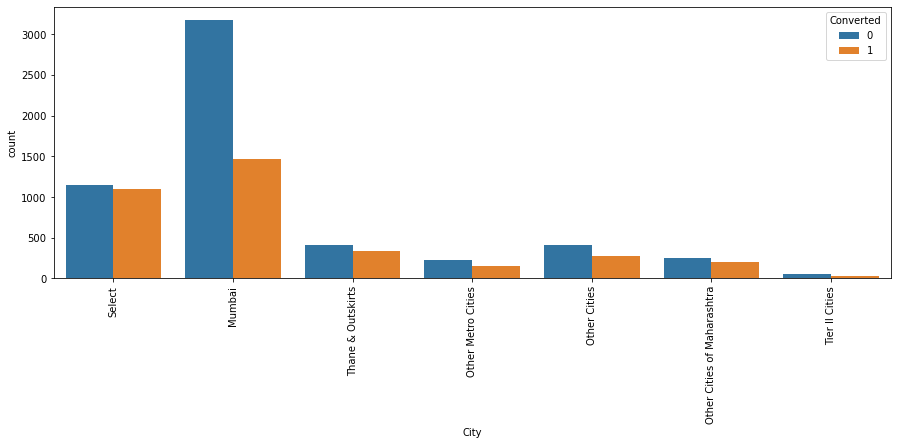

In [13]:
do_count_plot(df.City, df.Converted)


In [14]:
df['Specialization'].value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [15]:
df['Specialization'] = df['Specialization'].replace(np.nan, 'Not Specified')

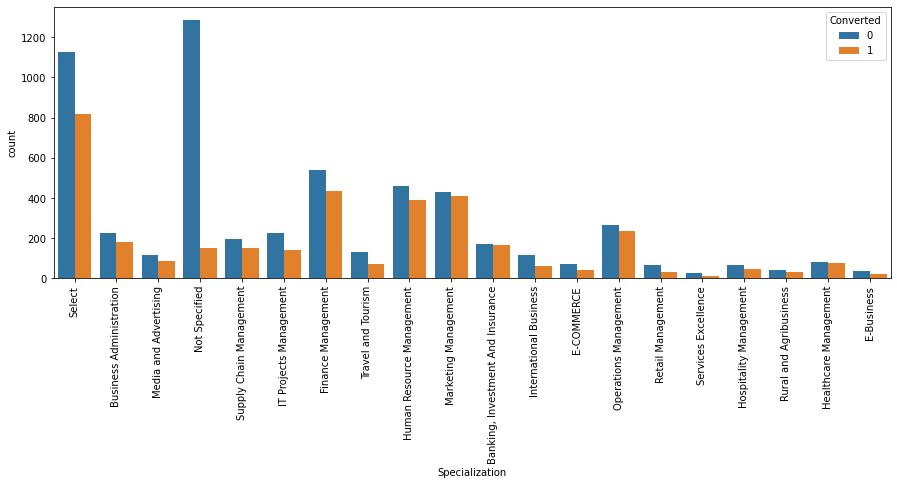

In [16]:
do_count_plot(df.Specialization, df.Converted)

In [17]:
df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [18]:
df['Lead Source'] = df['Lead Source'].replace(np.nan,'Others')

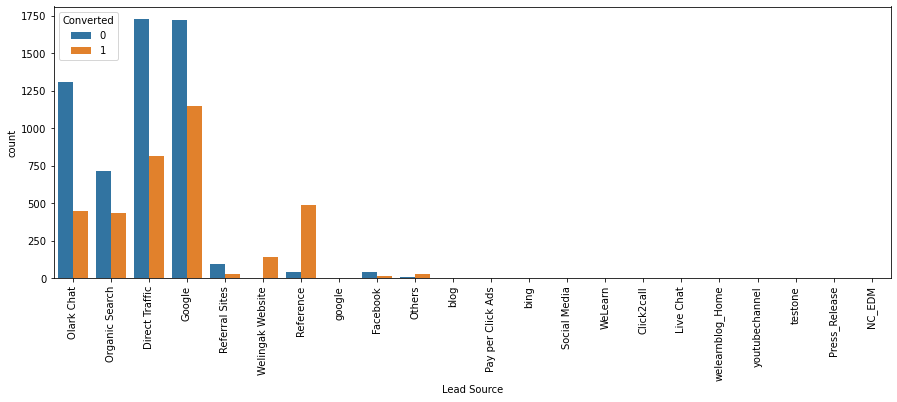

In [19]:
do_count_plot(df['Lead Source'],df.Converted)

In [20]:
df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [21]:
df['Last Activity'] = df['Last Activity'].replace(np.nan,'Others')

In [22]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                0.00
Lead Source                                0.00
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              0.00
Specialization                             0.00
Search                                     0.00
Magazine                                   0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                    0.00
Receive More Updates About Our Courses     0.00
Update me on Supply Chain Content          0.00
Get updates on DM Content                  0.00
City                                    

In [23]:
# dropping rows with na values
df = df.dropna()

In [24]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                0.00
Lead Source                                0.00
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              0.00
Specialization                             0.00
Search                                     0.00
Magazine                                   0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                    0.00
Receive More Updates About Our Courses     0.00
Update me on Supply Chain Content          0.00
Get updates on DM Content                  0.00
City                                    

In [25]:
# Handling imbalance

In [26]:
df.Search.value_counts(dropna=False)

No     9089
Yes      14
Name: Search, dtype: int64

In [27]:
df.Magazine.value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

In [28]:
df['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [29]:
df['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [30]:
df['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [31]:
df['Digital Advertisement'].value_counts(dropna=False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [32]:
df['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [33]:
df['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [34]:
df['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [35]:
df['Get updates on DM Content'].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

In [36]:
df['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [37]:
df['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [38]:
cols_to_drop=['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque', 'Do Not Call']

In [39]:
df = df.drop(cols_to_drop,1)

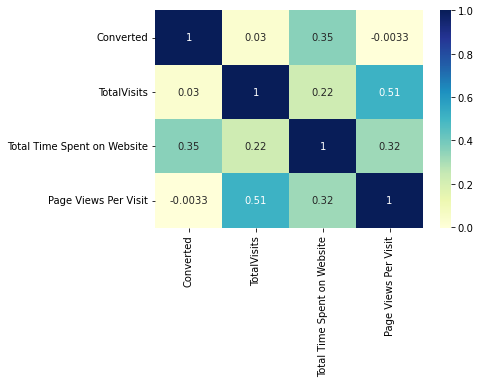

In [40]:
# Checking correlation
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

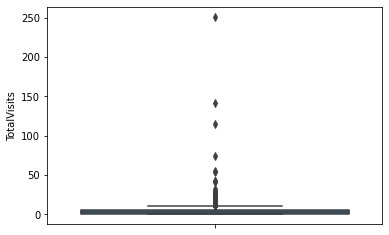

In [41]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['TotalVisits'])
plt.show()

In [42]:
df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count   9103.00
mean       3.45
std        4.85
min        0.00
5%         0.00
25%        1.00
50%        3.00
75%        5.00
90%        7.00
95%       10.00
99%       17.00
max      251.00
Name: TotalVisits, dtype: float64

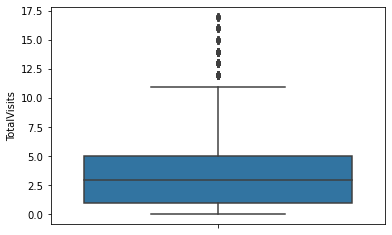

In [43]:
# remove top 1%

Q = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits <= Q)]
sns.boxplot(y=df['TotalVisits'])
plt.show()

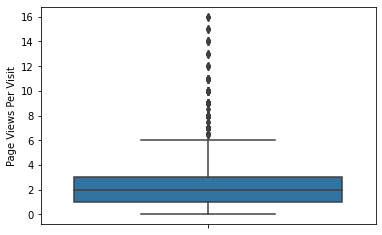

In [44]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

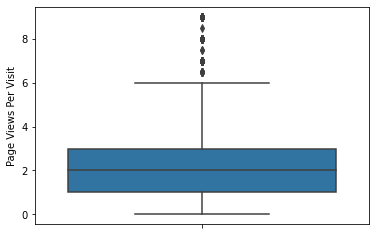

In [45]:
Q = df['Page Views Per Visit'].quantile(0.99)
df = df[df['Page Views Per Visit'] <= Q]
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

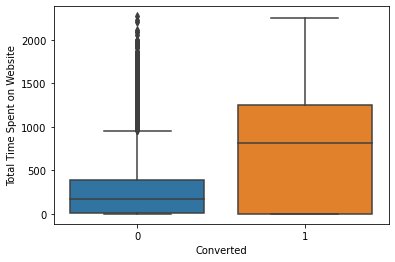

In [46]:
sns.boxplot(x=df.Converted, y=df['Total Time Spent on Website'])
plt.show()

In [47]:
cat_cols= df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [48]:
varlist =  ['A free copy of Mastering The Interview','Do Not Email']

In [49]:
def bmap(x):
    return x.map({'Yes': 1, "No": 0})

In [50]:
df[varlist] = df[varlist].apply(bmap)

In [51]:
# Dummy variables

dummy = pd.get_dummies(df[['Lead Origin','City']], drop_first=True)
df = pd.concat([df,dummy],1)
dummy = pd.get_dummies(df['Specialization'], prefix  = 'Specialization', drop_first=True)
dummy = dummy.drop(['Specialization_Not Specified'], 1)
df = pd.concat([df, dummy], axis = 1)

dummy = pd.get_dummies(df['Lead Source'], prefix  = 'Lead Source', drop_first=True)
dummy = dummy.drop(['Lead Source_Others'], 1)
df = pd.concat([df, dummy], axis = 1)
dummy = pd.get_dummies(df['Last Activity'], prefix  = 'Last Activity', drop_first=True)
df = pd.concat([df, dummy], axis = 1)
dummy = pd.get_dummies(df['Last Notable Activity'], prefix  = 'Last Notable Activity', drop_first=True)
df = pd.concat([df, dummy], axis = 1)


In [52]:
df.drop(cat_cols,1,inplace = True)

In [53]:
# Train-Test Split
y = df['Converted']

X=df.drop('Converted', axis=1)

In [54]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [55]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 3385 to 7509
Data columns (total 81 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   TotalVisits                                         6267 non-null   float64
 1   Total Time Spent on Website                         6267 non-null   int64  
 2   Page Views Per Visit                                6267 non-null   float64
 3   Lead Origin_Landing Page Submission                 6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                           6267 non-null   uint8  
 5   Lead Origin_Lead Import                             6267 non-null   uint8  
 6   City_Other Cities                                   6267 non-null   uint8  
 7   City_Other Cities of Maharashtra                    6267 non-null   uint8  
 8   City_Other Metro Cities                             6267 non-null   uint8  

In [56]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3385,-0.39,-0.35,-0.13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2273,-1.08,-0.88,-1.19,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4234,0.30,-0.68,0.94,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
945,-0.04,-0.12,0.41,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8689,-1.08,-0.88,-1.19,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [57]:
# Model Building

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [58]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [59]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2806.4
Date:                Tue, 25 Jul 2023   Deviance:                       5612.8
Time:                        18:44:18   Pearson chi2:                 6.46e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3544
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.6944      0.077    -22.120      0.000      -1.845      -1.544
Total Time Spent on Website                        1.1292      0.039     28.853      0.000       1.052       1.206
Lead Origin_Lead Add Form                          3.3247      0.646      5.148      0.000       2.059       4.590
Lead Origin_Lead Import                            1.2455      0.462      2.698      0.007       0.341       2.150
Lead Source_Olark Chat                             1.1538      0.100     11.565      0.000       0.958       1.349
Lead Source_Reference                              0.9809      0.677      1.448      0.148      -0.347       2.308
Lead Source_Welingak Website                       3.0080      1.198      2.511      0.012       0.660       5.356
Last Activity_Email Bounced                       -2.2737      0.525     -4.330      0.000      -3.303      -1.245
Last Activity_Email Opened                         0.5971      0.088      6.762      0.000       0.424       0.770
Last Activity_Email Received                      21.2295   1.21e+04      0.002      0.999   -2.38e+04    2.38e+04
Last Activity_Had a Phone Conversation             2.0807      0.945      2.202      0.028       0.228       3.933
Last Activity_Olark Chat Conversation             -1.0461      0.167     -6.258      0.000      -1.374      -0.718
Last Notable Activity_Email Bounced                1.8784      0.685      2.743      0.006       0.536       3.220
Last Notable Activity_Had a Phone Conversation     0.9129      1.456      0.627      0.531      -1.940       3.766
Last Notable Activity_SMS Sent                     1.9159      0.098     19.636      0.000       1.725       2.107
Last Notable Activity_Unreachable                  1.9906      0.495      4.020      0.000       1.020       2.961
==================================================================================================================
"""

In [60]:
### p-value of variable "Last Notable Activity_Had a Phone Conversation" is high, so we can drop it.

In [61]:
col=col.drop("Last Notable Activity_Had a Phone Conversation",1)

In [62]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2806.6
Date:                Tue, 25 Jul 2023   Deviance:                       5613.2
Time:                        18:44:18   Pearson chi2:                 6.46e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3544
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.6945      0.077    -22.121      0.000      -1.845      -1.544
Total Time Spent on Website                1.1294      0.039     28.859      0.000       1.053       1.206
Lead Origin_Lead Add Form                  3.3250      0.646      5.149      0.000       2.059       4.591
Lead Origin_Lead Import                    1.2459      0.462      2.699      0.007       0.341       2.151
Lead Source_Olark Chat                     1.1541      0.100     11.569      0.000       0.959       1.350
Lead Source_Reference                      0.9806      0.677      1.448      0.148      -0.347       2.308
Lead Source_Welingak Website               3.0080      1.198      2.511      0.012       0.660       5.356
Last Activity_Email Bounced               -2.2737      0.525     -4.330      0.000      -3.303      -1.245
Last Activity_Email Opened                 0.5971      0.088      6.762      0.000       0.424       0.770
Last Activity_Email Received              21.2294   1.21e+04      0.002      0.999   -2.38e+04    2.38e+04
Last Activity_Had a Phone Conversation     2.5093      0.698      3.597      0.000       1.142       3.877
Last Activity_Olark Chat Conversation     -1.0461      0.167     -6.258      0.000      -1.374      -0.718
Last Notable Activity_Email Bounced        1.8784      0.685      2.743      0.006       0.536       3.220
Last Notable Activity_SMS Sent             1.9159      0.098     19.635      0.000       1.725       2.107
Last Notable Activity_Unreachable          1.9908      0.495      4.020      0.000       1.020       2.961
==========================================================================================================
"""

In [63]:
col=col.drop("Last Activity_Email Received",1)

In [64]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2808.7
Date:                Tue, 25 Jul 2023   Deviance:                       5617.5
Time:                        18:44:18   Pearson chi2:                 6.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3540
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.6881      0.076    -22.088      0.000      -1.838      -1.538
Total Time Spent on Website                1.1300      0.039     28.879      0.000       1.053       1.207
Lead Origin_Lead Add Form                  3.3241      0.646      5.148      0.000       2.059       4.590
Lead Origin_Lead Import                    1.2453      0.462      2.698      0.007       0.341       2.150
Lead Source_Olark Chat                     1.1538      0.100     11.567      0.000       0.958       1.349
Lead Source_Reference                      0.9801      0.677      1.447      0.148      -0.347       2.307
Lead Source_Welingak Website               3.0069      1.198      2.510      0.012       0.659       5.354
Last Activity_Email Bounced               -2.2804      0.525     -4.343      0.000      -3.310      -1.251
Last Activity_Email Opened                 0.5906      0.088      6.699      0.000       0.418       0.763
Last Activity_Had a Phone Conversation     2.5027      0.698      3.587      0.000       1.135       3.870
Last Activity_Olark Chat Conversation     -1.0523      0.167     -6.297      0.000      -1.380      -0.725
Last Notable Activity_Email Bounced        1.8783      0.685      2.743      0.006       0.536       3.221
Last Notable Activity_SMS Sent             1.9095      0.097     19.595      0.000       1.719       2.101
Last Notable Activity_Unreachable          1.9844      0.495      4.007      0.000       1.014       2.955
==========================================================================================================
"""

In [65]:
col=col.drop("Lead Source_Reference",1)

In [66]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6254
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2809.6
Date:                Tue, 25 Jul 2023   Deviance:                       5619.2
Time:                        18:44:18   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3538
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.6874      0.076    -22.087      0.000      -1.837      -1.538
Total Time Spent on Website                1.1298      0.039     28.875      0.000       1.053       1.206
Lead Origin_Lead Add Form                  4.2325      0.211     20.073      0.000       3.819       4.646
Lead Origin_Lead Import                    1.2445      0.462      2.696      0.007       0.340       2.149
Lead Source_Olark Chat                     1.1530      0.100     11.558      0.000       0.957       1.348
Lead Source_Welingak Website               2.0978      1.030      2.036      0.042       0.079       4.117
Last Activity_Email Bounced               -2.2809      0.525     -4.344      0.000      -3.310      -1.252
Last Activity_Email Opened                 0.5906      0.088      6.702      0.000       0.418       0.763
Last Activity_Had a Phone Conversation     2.5026      0.698      3.588      0.000       1.135       3.870
Last Activity_Olark Chat Conversation     -1.0520      0.167     -6.298      0.000      -1.379      -0.725
Last Notable Activity_Email Bounced        1.8784      0.685      2.743      0.006       0.536       3.221
Last Notable Activity_SMS Sent             1.9078      0.097     19.581      0.000       1.717       2.099
Last Notable Activity_Unreachable          1.9848      0.495      4.009      0.000       1.015       2.955
==========================================================================================================
"""

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Olark Chat,1.76
1,Lead Origin_Lead Add Form,1.45
8,Last Activity_Olark Chat Conversation,1.39
0,Total Time Spent on Website,1.30
4,Lead Source_Welingak Website,1.25
5,Last Activity_Email Bounced,1.23
9,Last Notable Activity_Email Bounced,1.23
10,Last Notable Activity_SMS Sent,1.18
6,Last Activity_Email Opened,1.17
2,Lead Origin_Lead Import,1.01


In [69]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3385   0.18
2273   0.82
4234   0.37
945    0.14
8689   0.28
3142   0.07
6033   0.17
2350   0.10
3490   0.21
5066   0.16
dtype: float64

In [70]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.1831907 , 0.82466434, 0.36666832, 0.13890116, 0.28076343,
       0.07022042, 0.16703906, 0.10148716, 0.20555685, 0.16389206])

In [71]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.18,3385
1,1,0.82,2273
2,0,0.37,4234
3,0,0.14,945
4,0,0.28,8689


In [72]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.18,3385,0
1,1,0.82,2273,1
2,0,0.37,4234,0
3,0,0.14,945,0
4,0,0.28,8689,0


In [73]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3370  482]
 [ 806 1609]]


In [74]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [75]:
sensitivity=TP / float(TP+FN)
sensitivity

0.6662525879917184

In [76]:
specificity=TN / float(TN+FP)
specificity

0.8748701973001038

In [77]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [78]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

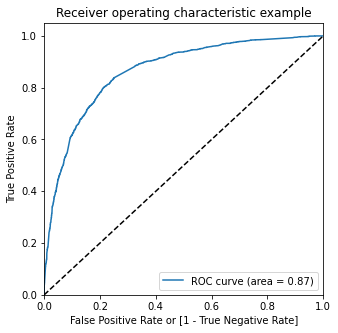

In [79]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [80]:
numbers = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.18,3385,0,1,1,0,0,0,0,0,0,0,0
1,1,0.82,2273,1,1,1,1,1,1,1,1,1,1,0
2,0,0.37,4234,0,1,1,1,1,0,0,0,0,0,0
3,0,0.14,945,0,1,1,0,0,0,0,0,0,0,0
4,0,0.28,8689,0,1,1,1,0,0,0,0,0,0,0


In [81]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])

In [82]:
for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensitivity  specificity
0.00  0.00      0.39         1.00         0.00
0.10  0.10      0.57         0.98         0.31
0.20  0.20      0.72         0.91         0.61
0.30  0.30      0.79         0.83         0.76
0.40  0.40      0.79         0.75         0.82
0.50  0.50      0.79         0.67         0.87
0.60  0.60      0.78         0.54         0.92
0.70  0.70      0.76         0.46         0.95
0.80  0.80      0.73         0.36         0.97
0.90  0.90      0.68         0.18         0.99


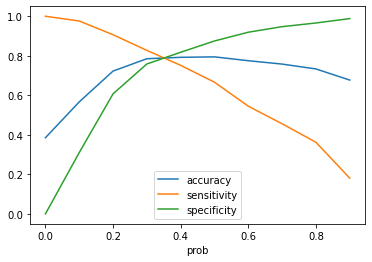

In [83]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

In [84]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.18,3385,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.82,2273,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.37,4234,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.14,945,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.28,8689,0,1,1,1,0,0,0,0,0,0,0,0


In [85]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.18,3385,0,18
1,1,0.82,2273,1,82
2,0,0.37,4234,1,37
3,0,0.14,945,0,14
4,0,0.28,8689,0,28


In [86]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7850646242221159

In [87]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2922,  930],
       [ 417, 1998]], dtype=int64)

In [88]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [89]:
from sklearn.metrics import precision_score, recall_score

In [90]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8273291925465839

In [91]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.6823770491803278

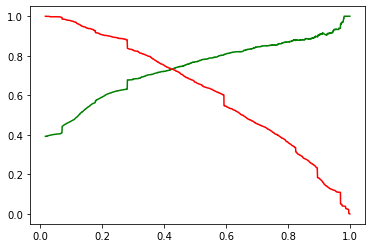

In [115]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [92]:
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

In [93]:
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5098,-1.09,-0.87,-1.21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4535,-0.41,0.36,-0.18,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3190,0.28,2.09,0.86,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7457,0.62,-0.51,1.37,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6974,-1.09,-0.87,-1.21,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [94]:
X_test = X_test[col]

In [95]:
X_test_sm = sm.add_constant(X_test)

In [96]:
y_test_pred = res.predict(X_test_sm)

In [97]:
y_test_pred[:10]

5098   0.07
4535   0.65
3190   0.93
7457   0.16
6974   0.60
8329   0.18
5759   0.28
7151   0.18
5989   0.38
1152   0.59
dtype: float64

In [98]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [99]:
y_test_df = pd.DataFrame(y_test)

In [100]:
y_test_df['Prospect ID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [101]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [102]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})


In [103]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,5098,0.07
1,1,4535,0.65
2,1,3190,0.93
3,0,7457,0.16
4,1,6974,0.60


In [104]:
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [105]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,5098,0,0.07,7
1,4535,1,0.65,65
2,3190,1,0.93,93
3,7457,0,0.16,16
4,6974,1,0.60,60


In [106]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [107]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,5098,0,0.07,7,0
1,4535,1,0.65,65,1
2,3190,1,0.93,93,1
3,7457,0,0.16,16,0
4,6974,1,0.60,60,1


In [108]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7777364110201043

In [109]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1282,  424],
       [ 173,  807]], dtype=int64)

In [110]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [111]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.823469387755102

In [112]:
# Let us calculate specificity
TN / float(TN+FP)

0.7514654161781946

In [113]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.6555645816409423

In [114]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.823469387755102